# Model Training 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
### Reading the clean data we create in previous EDA and FE part
df = pd.read_csv('clean_data.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [5]:
df.shape

(243, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 21.0 KB


#### Separating **Depandant** and **Indepandent Features**

In [7]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [8]:
X.sample()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
112,31,55,11,0.0,87.8,16.5,57.9,5.4,19.2,1


In [9]:
y.sample()

55    15.3
Name: FWI, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state=42)

### `Multi-Collinearity Problems Checking with Correlation`

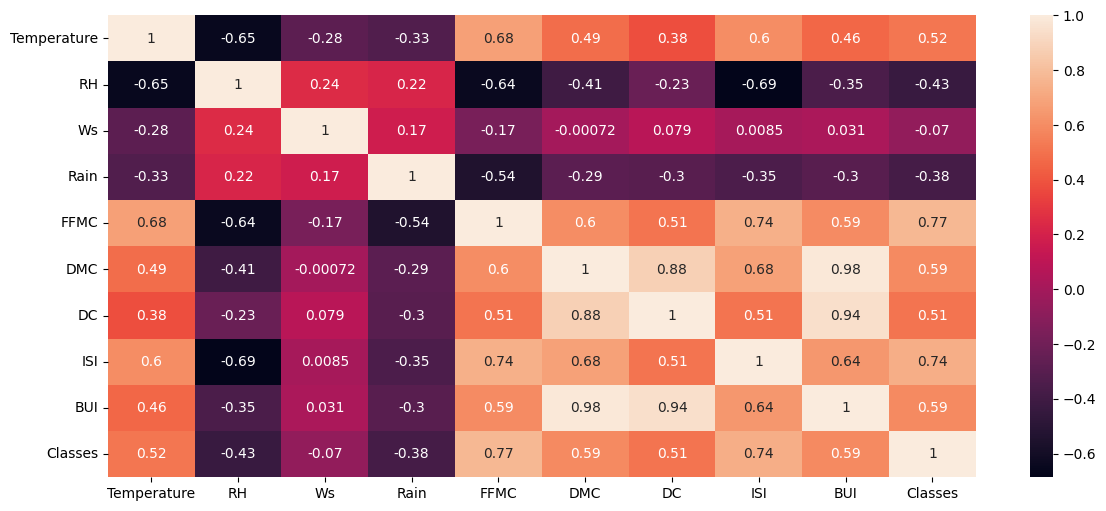

In [24]:
plt.figure(figsize=(14,6))
sns.heatmap(X.corr(),annot=True)
plt.show()

#### `Remove columns which having correlation >=90%`

In [22]:
def corr(dataset,threshold):
    col_names =set()
    col_matrix = dataset.corr()
    for i in range(len(col_matrix)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>=threshold:
                col = col_matrix.columns[i]
                col_names.add(col)
    return col_names

In [26]:
correlated_features = corr(X,.85)
correlated_features

{'BUI', 'DC'}

In [28]:
## Now we remove these correlated features 
X_train.drop(correlated_features,axis=1,inplace=True )
X_test.drop(correlated_features,axis=1,inplace=True )

In [29]:
X_train.shape

(194, 8)

In [30]:
y_train.shape

(194,)

#### `Scaling the features or Standardization`

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

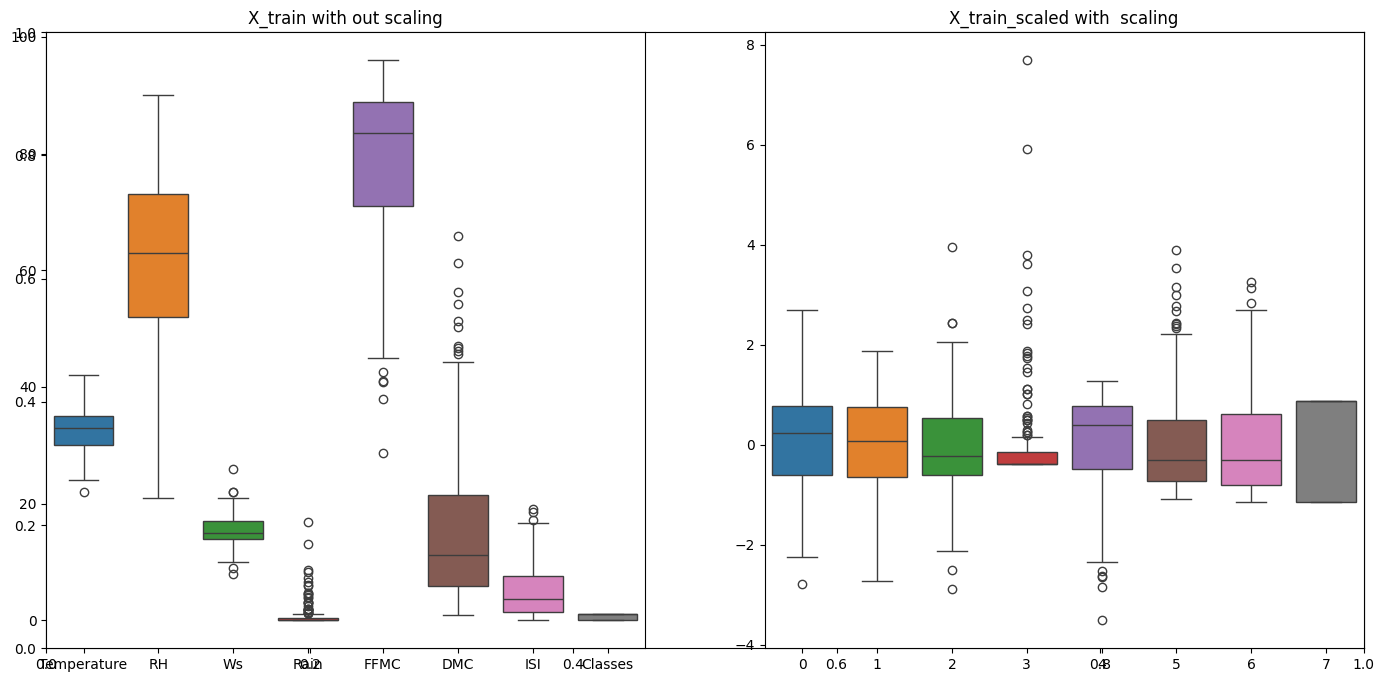

In [42]:
plt.subplots(figsize=(17,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train with out scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_scaled with  scaling')
plt.show()

`This show how boxplot takes all the features in one Range`

## Applying Linear Regression

Mean Square Error:  0.6973545616016192
Mean Absolute Error:  0.5117893923448024
Root Mean Square Error:  0.8350775781935588
r2_score:  0.9769913929101305
adjusted_r2_score:  0.9723896714921566


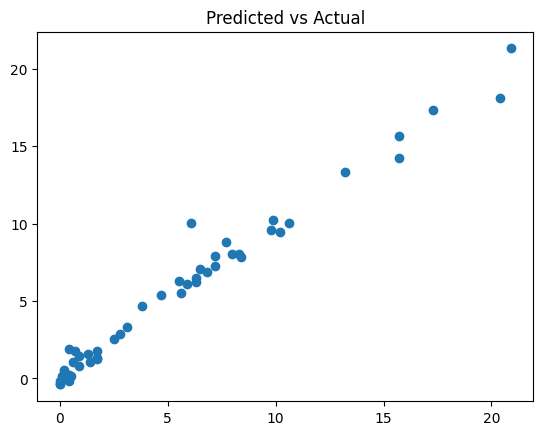

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

mod_lr = LinearRegression()
mod_lr.fit(X_train_scaled,y_train)
y_pred = mod_lr.predict(X_test_scaled)

## performance measure 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

score_r2 = r2_score(y_test,y_pred)
ajst_r2_score = 1 - ( (1 - score_r2) * (len(X_test) - 1) ) / (len(X_test) - X_test.shape[1] - 1)

print('Mean Square Error: ',mse)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error: ',rmse)

print('r2_score: ',score_r2) 
print('adjusted_r2_score: ',ajst_r2_score) 
plt.scatter(y_test,y_pred)
plt.title('Predicted vs Actual')
plt.show()


### `Lasso Regression`

Mean Square Error:  1.7260423250231405
Mean Absolute Error:  1.0093958923873403
Root Mean Square Error:  1.3137893000870196
r2_score:  0.9430507350726564
adjusted_r2_score:  0.9316608820871877


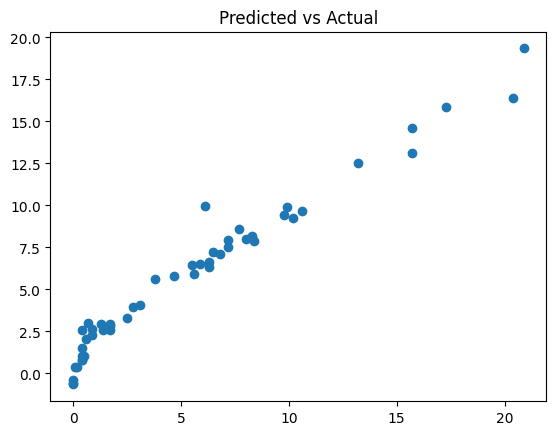

In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

## performance measure 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

score_r2 = r2_score(y_test,y_pred)
ajst_r2_score = 1 - ( (1 - score_r2) * (len(X_test) - 1) ) / (len(X_test) - X_test.shape[1] - 1)

print('Mean Square Error: ',mse)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error: ',rmse)

print('r2_score: ',score_r2) 
print('adjusted_r2_score: ',ajst_r2_score) 
plt.scatter(y_test,y_pred)
plt.title('Predicted vs Actual')
plt.show()


### `Cross Validation Lasso`

In [53]:
from sklearn.linear_model import LassoCV
lasscv = LassoCV(cv=5)
lasscv.fit(X_train_scaled,y_train)

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


Mean Square Error:  0.8329297185058132
Mean Absolute Error:  0.5719858203609419
Root Mean Square Error:  0.9126498334552049
r2_score:  0.9725182085529627
adjusted_r2_score:  0.9670218502635552


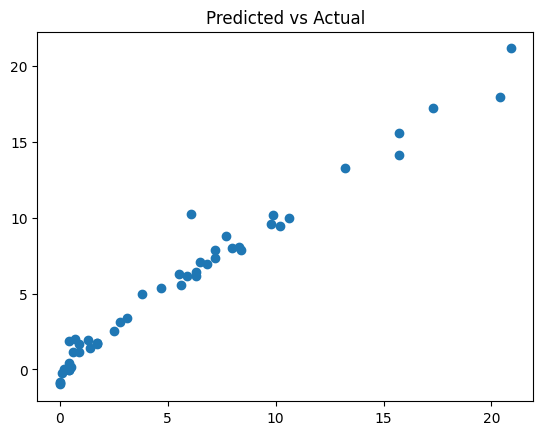

In [62]:
y_pred = lasscv.predict(X_test_scaled)
# performance measure 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

score_r2 = r2_score(y_test,y_pred)
ajst_r2_score = 1 - ( (1 - score_r2) * (len(X_test) - 1) ) / (len(X_test) - X_test.shape[1] - 1)

print('Mean Square Error: ',mse)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error: ',rmse)

print('r2_score: ',score_r2) 
print('adjusted_r2_score: ',ajst_r2_score) 
plt.scatter(y_test,y_pred)
plt.title('Predicted vs Actual')
plt.show()

### `Ridge Regression`

Mean Square Error:  0.71328396114426
Mean Absolute Error:  0.5217882117379496
Root Mean Square Error:  0.8445614016424501
r2_score:  0.9764658162301524
adjusted_r2_score:  0.9717589794761828


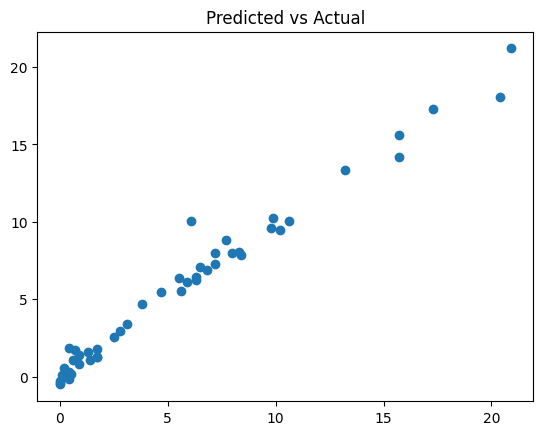

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)


## performance measure 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

score_r2 = r2_score(y_test,y_pred)
ajst_r2_score = 1 - ( (1 - score_r2) * (len(X_test) - 1) ) / (len(X_test) - X_test.shape[1] - 1)

print('Mean Square Error: ',mse)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error: ',rmse)

print('r2_score: ',score_r2) 
print('adjusted_r2_score: ',ajst_r2_score) 
plt.scatter(y_test,y_pred)
plt.title('Predicted vs Actual')
plt.show()


`Ridge Regression with Cross Validation`

Mean Square Error:  0.9580732275173528
Mean Absolute Error:  0.6877291062899066
Root Mean Square Error:  0.9788121512922451
r2_score:  0.9683892073429026
adjusted_r2_score:  0.9620670488114831


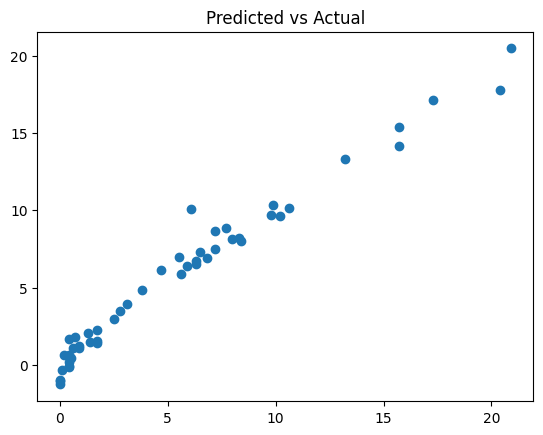

In [68]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)

y_pred = ridge_cv.predict(X_test_scaled)
# performance measure 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

score_r2 = r2_score(y_test,y_pred)
ajst_r2_score = 1 - ( (1 - score_r2) * (len(X_test) - 1) ) / (len(X_test) - X_test.shape[1] - 1)

print('Mean Square Error: ',mse)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error: ',rmse)

print('r2_score: ',score_r2) 
print('adjusted_r2_score: ',ajst_r2_score) 
plt.scatter(y_test,y_pred)
plt.title('Predicted vs Actual')
plt.show()

In [64]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

### `ElasticNet Regression`

Mean Square Error:  4.009921505314303
Mean Absolute Error:  1.683441719461149
Root Mean Square Error:  2.002478840166433
r2_score:  0.8676961284011762
adjusted_r2_score:  0.8412353540814114


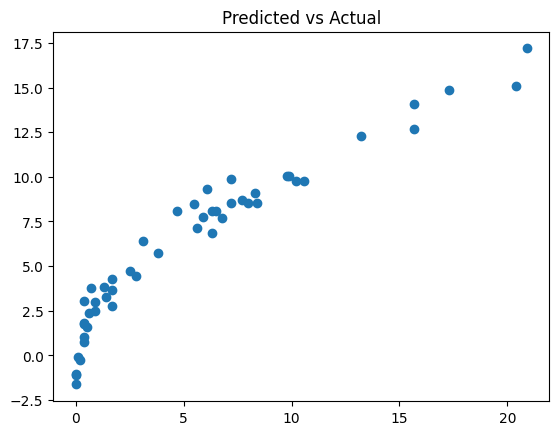

In [67]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)


## performance measure 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

score_r2 = r2_score(y_test,y_pred)
ajst_r2_score = 1 - ( (1 - score_r2) * (len(X_test) - 1) ) / (len(X_test) - X_test.shape[1] - 1)

print('Mean Square Error: ',mse)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error: ',rmse)

print('r2_score: ',score_r2) 
print('adjusted_r2_score: ',ajst_r2_score) 
plt.scatter(y_test,y_pred)
plt.title('Predicted vs Actual')
plt.show()


`ElasticNet with Cross Validation`

Mean Square Error:  0.822582249176682
Mean Absolute Error:  0.5947397562561424
Root Mean Square Error:  0.9069632016662429
r2_score:  0.9728596143015988
adjusted_r2_score:  0.9674315371619187


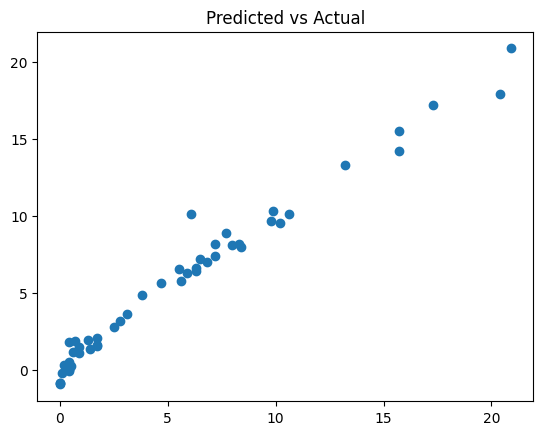

In [72]:
from sklearn.linear_model import ElasticNetCV
elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(X_train_scaled,y_train)

y_pred = elastic_cv.predict(X_test_scaled)
# performance measure 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

score_r2 = r2_score(y_test,y_pred)
ajst_r2_score = 1 - ( (1 - score_r2) * (len(X_test) - 1) ) / (len(X_test) - X_test.shape[1] - 1)

print('Mean Square Error: ',mse)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error: ',rmse)

print('r2_score: ',score_r2) 
print('adjusted_r2_score: ',ajst_r2_score) 
plt.scatter(y_test,y_pred)
plt.title('Predicted vs Actual')
plt.show()

In [73]:
elastic_cv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

## As `Ridge Regression` has `highest Accuracy` so we `export` this with the `preprocessing` part 'StandardScaler'

In [ ]:
import pickle
pickle.dump(ridge,open('ridge_reg_model.pkl','wb'))
pickle.dump(scaler,open('scaler_reg.pkl','wb'))